## Logistic Regression Modeling for Early Stage Diabetes Risk Prediction

## Part 2.1: Getting familiar with linear algebraic functions

#### Tasks
- Create matrix of size 10*10 with random integer numbers
- Compute the following linear algebric operations on the matrix using built in functions supported in Numpy, Scipy etc.
  - Find inverse of the matrix and print it
  - Calculate dot product of the matrix with same matrix in transpose A.AT
  - Decompose the original matrix using eigen decomposition print the eigen values and eigen vectors
  - Calculate jacobian matrix 
  - Calculate hessian matrix

In [222]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [223]:
# Matrix 10*10 - Random Values
n=np.random.randint(0,100,size=(10,10))
n

array([[11, 58, 96, 88, 38, 52, 91, 63, 77, 74],
       [33, 78, 20,  9,  1, 34, 10, 35,  8, 55],
       [21, 67, 66, 38, 14, 99, 81, 27, 40, 13],
       [35,  0, 77, 18, 32, 33, 61, 53,  0,  3],
       [43, 63,  0, 58, 12, 36,  4,  3,  1, 86],
       [ 7, 92, 88, 53, 83, 63, 17, 64, 24, 74],
       [66, 36, 78, 36, 42,  8, 53, 60, 75, 87],
       [55, 39, 38, 40, 68,  0, 41, 36, 68, 66],
       [ 7, 76, 48, 57, 70, 22, 76, 59, 29, 80],
       [93, 90, 33, 78, 54, 27, 16, 33, 26, 49]])

In [224]:
# Inverse
n_inv=np.linalg.inv(n)
n_inv

array([[-0.00487396,  0.00123203,  0.00133384,  0.00565726,  0.00265062,
        -0.00392122,  0.00243108,  0.00334993, -0.0039208 ,  0.00412002],
       [-0.02047779, -0.01875482,  0.01511716, -0.02585596, -0.01245728,
         0.00269295,  0.03808512, -0.04377198,  0.02496109,  0.01793106],
       [-0.03480207, -0.05247236,  0.02320812, -0.03145976, -0.0077608 ,
         0.01166352,  0.07812784, -0.07954298,  0.0308292 ,  0.02132068],
       [ 0.02007988,  0.00423644, -0.01135753,  0.00719015,  0.00391266,
        -0.00279862, -0.02076598,  0.0097787 , -0.00949322,  0.0040505 ],
       [-0.00710811, -0.00598214,  0.00155959,  0.00339722,  0.00131398,
         0.00587357, -0.00815005,  0.01518778,  0.00165637, -0.00303967],
       [ 0.02199352,  0.03220604, -0.00893763,  0.02608028,  0.01246395,
         0.00032566, -0.05284832,  0.05605356, -0.03169851, -0.02087252],
       [-0.01306742, -0.01449357,  0.0116877 , -0.00585568, -0.00072221,
        -0.00737134,  0.01892821, -0.01879081

In [225]:
# Dot Product with Transpose
nT=np.transpose(n)
np.dot(n,nT)

array([[48248, 17206, 32591, 21405, 18553, 37858, 36298, 28738, 36699,
        28894],
       [17206, 13225, 13751,  6641, 12974, 18541, 15199, 11889, 15907,
        16641],
       [32591, 13751, 29786, 16627, 12623, 26559, 21738, 16619, 23680,
        20418],
       [21405,  6641, 16627, 16130,  4782, 17361, 17246, 12354, 15936,
        12691],
       [18553, 12974, 12623,  4782, 18044, 19083, 15935, 13974, 17417,
        20216],
       [37858, 18541, 26559, 17361, 19083, 40361, 29515, 24598, 33166,
        28786],
       [36298, 15199, 21738, 17246, 15935, 29515, 34463, 27469, 28813,
        26285],
       [28738, 11889, 16619, 12354, 13974, 24598, 27469, 24171, 24705,
        23517],
       [36699, 15907, 23680, 15936, 17417, 33166, 28813, 24705, 33260,
        25732],
       [28894, 16641, 20418, 12691, 20216, 28786, 26285, 23517, 25732,
        31989]])

In [226]:
#Eigen Decomposition - Eigen Values, Eigen Vectors
from numpy.linalg import eig
Val,Vec=eig(n)
#eig(n)
print(Val)
print(Vec)

[450.48492185 +0.j         -58.96298794+17.21561146j
 -58.96298794-17.21561146j -47.97520596+36.61745377j
 -47.97520596-36.61745377j  22.45248566+58.60658332j
  22.45248566-58.60658332j  10.25050139 +0.j
  41.55728734 +0.j          81.6787059  +0.j        ]
[[-0.43580246+0.j         -0.04700644+0.20253288j -0.04700644-0.20253288j
  -0.07044683+0.24212244j -0.07044683-0.24212244j -0.18579232+0.03916466j
  -0.18579232-0.03916466j  0.00390574+0.j         -0.02420851+0.j
   0.18000843+0.j        ]
 [-0.18812319+0.j          0.04982671+0.17262749j  0.04982671-0.17262749j
  -0.05475302-0.22553092j -0.05475302+0.22553092j -0.05678699-0.06478723j
  -0.05678699+0.06478723j  0.35673593+0.j          0.59116769+0.j
  -0.09119871+0.j        ]
 [-0.32394405+0.j          0.55132224+0.j          0.55132224-0.j
  -0.22671916+0.18241877j -0.22671916-0.18241877j -0.48102787+0.j
  -0.48102787-0.j          0.52346783+0.j          0.043038  +0.j
  -0.34990444+0.j        ]
 [-0.22776071+0.j         -0.039509

In [227]:
#Jacobian
import numdifftools as nd
nd.Jacobian(n)

In [228]:
#Hessian
nd.Hessian(n)

## Part 2.2: Logistic Regression using newton method

### Logistic regression
Logistic regression uses an equation as the representation, very much like linear regression.

Input values (x) are combined linearly using weights or coefficient values (referred to as W) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a continuous value.<br>

###  $\hat{y}(w, x) = \frac{1}{1+exp^{-(w_0 + w_1 * x_1 + ... + w_p * x_p)}}$

#### Dataset
The dataset is available at <strong>"data/diabetes_data.csv"</strong> in the respective challenge's repo.<br>
<strong>Original Source:</strong> http://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv. The dataset just got released in July 2020.<br><br>

#### Features (X)

1. Age                - Values ranging from 16-90
2. Gender             - Binary value (Male/Female)
3. Polyuria           - Binary value (Yes/No)
4. Polydipsia         - Binary value (Yes/No)
5. sudden weight loss - Binary value (Yes/No)
6. weakness           - Binary value (Yes/No)
7. Polyphagia         - Binary value (Yes/No)
8. Genital thrush     - Binary value (Yes/No)
9. visual blurring    - Binary value (Yes/No)
10. Itching           - Binary value (Yes/No)
11. Irritability      - Binary value (Yes/No)
12. delayed healing   - Binary value (Yes/No)
13. partial paresis   - Binary value (Yes/No)
14. muscle stiffness  - Binary value (Yes/No)
15. Alopecia          - Binary value (Yes/No)
16. Obesity           - Binary value (Yes/No)

#### Output/Target target (Y) 
17. class - Binary class (Positive/Negative)

#### Objective
To learn logistic regression and practice handling of both numerical and categorical features

#### Tasks
- Download, load the data and print first 5 and last 5 rows
- Transform categorical features into numerical features. Use label encoding or any other suitable preprocessing technique
- Since the age feature is in larger range, age column can be normalized into smaller scale (like 0 to 1) using different methods such as scaling, standardizing or any other suitable preprocessing technique (Example - sklearn.preprocessing.MinMaxScaler class)
- Define X matrix (independent features) and y vector (target feature)
- Split the dataset into 60% for training and rest 40% for testing (sklearn.model_selection.train_test_split function)
- Train Logistic Regression Model on the training set (sklearn.linear_model.LogisticRegression class)
- Use the trained model to predict on testing set
- Print 'Accuracy' obtained on the testing dataset i.e. (sklearn.metrics.accuracy_score function)

#### Further fun (will not be evaluated)
- Plot loss curve (Loss vs number of iterations)
- Preprocess data with different feature scaling methods (i.e. scaling, normalization, standardization, etc) and observe accuracies on both X_train and X_test
- Training model on different train-test splits such as 60-40, 50-50, 70-30, 80-20, 90-10, 95-5 etc. and observe accuracies on both X_train and X_test
- Shuffling of training samples with different *random seed values* in the train_test_split function. Check the model error for the testing data for each setup.
- Print other classification metrics such as:
    - classification report (sklearn.metrics.classification_report),
    - confusion matrix (sklearn.metrics.confusion_matrix),
    - precision, recall and f1 scores (sklearn.metrics.precision_recall_fscore_support)

#### Helpful links
- Scikit-learn documentation for logistic regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- How Logistic Regression works: https://machinelearningmastery.com/logistic-regression-for-machine-learning/
- Feature Scaling: https://scikit-learn.org/stable/modules/preprocessing.html
- Training testing splitting: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Classification metrics in sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g

In [229]:
# Download the dataset from the source
!wget https://github.com/DeepConnectAI/challenge-week-3/raw/master/data/diabetes_data.csv

In [315]:
# NOTE: DO NOT CHANGE THE VARIABLE NAME(S) IN THIS CELL
# Load the data
data=pd.read_csv("diabetes_data.csv")
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [316]:
data.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [317]:
data.tail(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [318]:
# Handle categorical/binary columns
LE = preprocessing.LabelEncoder()
CateList = data.select_dtypes(include="object").columns
print(CateList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [319]:
for i in CateList:
    data[i] = LE.fit_transform(data[i].astype(str))

In [320]:
data.head(15)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [321]:
df=data['Age']
df

0      40
1      58
2      41
3      45
4      60
5      55
6      57
7      66
8      67
9      70
10     44
11     38
12     35
13     61
14     60
15     58
16     54
17     67
18     66
19     43
20     62
21     54
22     39
23     48
24     58
25     32
26     42
27     52
28     38
29     53
       ..
490    46
491    53
492    64
493    44
494    36
495    43
496    53
497    47
498    68
499    64
500    66
501    67
502    70
503    44
504    38
505    35
506    61
507    60
508    58
509    54
510    67
511    66
512    43
513    62
514    54
515    39
516    48
517    58
518    32
519    42
Name: Age, Length: 520, dtype: int64

In [322]:
#Min-Max Normalization
n_df=(df-df.min())/(df.max()-df.min())
n_df

0      0.324324
1      0.567568
2      0.337838
3      0.391892
4      0.594595
5      0.527027
6      0.554054
7      0.675676
8      0.689189
9      0.729730
10     0.378378
11     0.297297
12     0.256757
13     0.608108
14     0.594595
15     0.567568
16     0.513514
17     0.689189
18     0.675676
19     0.364865
20     0.621622
21     0.513514
22     0.310811
23     0.432432
24     0.567568
25     0.216216
26     0.351351
27     0.486486
28     0.297297
29     0.500000
         ...   
490    0.405405
491    0.500000
492    0.648649
493    0.378378
494    0.270270
495    0.364865
496    0.500000
497    0.418919
498    0.702703
499    0.648649
500    0.675676
501    0.689189
502    0.729730
503    0.378378
504    0.297297
505    0.256757
506    0.608108
507    0.594595
508    0.567568
509    0.513514
510    0.689189
511    0.675676
512    0.364865
513    0.621622
514    0.513514
515    0.310811
516    0.432432
517    0.567568
518    0.216216
519    0.351351
Name: Age, Length: 520, 

In [323]:
data=data.drop(columns='Age')
data=pd.concat([n_df,data],sort=False,axis=1)
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,0.527027,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,0.554054,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,0.675676,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,0.689189,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,0.729730,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [324]:
#Shuffling Data
data=data.sample(frac=1).reset_index(drop=True)
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.337838,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1
1,0.527027,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1,1
2,0.500000,1,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0
3,0.324324,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0,1
4,0.527027,1,1,1,1,1,0,1,0,0,1,0,1,0,0,0,1
5,0.594595,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1
6,0.364865,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
7,0.621622,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1,1
8,0.418919,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9,0.432432,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1


In [325]:
# Define your X and y
X=data.drop(['class'],axis=1).values
y=data['class'].values

In [326]:
# Split the dataset into training and testing here
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=123)

In [327]:
def predict(X, weights):
    '''Predict class for X.
    For the given dataset, predicted vector has only values 0/1
    Args:
        X : Numpy array (num_samples, num_features)
        weights : Model weights for logistic regression
    Returns:
        Binary predictions : (num_samples,)
    '''

    ### START CODE HERE ###
    z = np.dot(X,weights)
    y_pred = sigmoid(z)
    ### END CODE HERE ###
    
    return y_pred

In [328]:
def sigmoid(z):
        '''Sigmoid function: f:R->(0,1)
        Args:
            z : A numpy array (num_samples,)
        Returns:
            A numpy array where sigmoid function applied to every element
        '''
        ### START CODE HERE
        sig_z = 1/(1+np.exp(-z))
        ### END CODE HERE
        
        assert (z.shape==sig_z.shape), 'Error in sigmoid implementation. Check carefully'
        return sig_z

In [329]:
def cross_entropy_loss(y_true, y_pred):
    '''Calculate cross entropy loss
    Note: Cross entropy is defined for multiple classes/labels as well
    but for this dataset we only need binary cross entropy loss
    Args:
        y_true : Numpy array of true values (0/1) of size (num_samples,)
        y_pred : Numpy array of predicted values (probabilites) of size (num_samples,)
    Returns:
        Cross entropy loss: A scalar value
    '''
    # Fix 0 values in y_pred
    y_pred = np.maximum(np.full(y_pred.shape, 1e-7), np.minimum(np.full(y_pred.shape, 1-1e-7), y_pred))
    ### START CODE HERE
    ce_loss = -1*((y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))).mean()
    ### END CODE HERE
    
    return ce_loss

In [330]:
def newton_optimization(X, y, max_iterations=25):
    '''Implement netwon method for optimizing weights
    Args:
        X : Numpy array (num_samples, num_features)
        max_iterations : Max iterations to update the weights
    Returns:
        Optimal weights (num_features,)
    '''
    num_samples = X.shape[0]
    num_features = X.shape[1]
    # Initialize random weights
    weights = np.zeros(num_features,)
    # Initialize losses
    losses = []
    
    # Newton Method
    for i in range(max_iterations):
        # Predict/Calculate probabilties using sigmoid function
        z = np.dot(X,weights)
        y_p = sigmoid(z)
        
        # Define gradient for J (cost function) i.e. cross entropy loss
        gradient = (1/(num_samples))*np.dot(X.transpose(),(y_p-y))
        
        # Define hessian matrix for cross entropy loss
        hessian = (1/(num_samples))*X.T.dot(np.diag(y_p).dot(np.diag(1-y_p)).dot(X))
        
        # Update the model using hessian matrix and gradient computed
        weights-=np.dot(np.linalg.inv(hessian),gradient)
        
        # Calculate cross entropy loss
        loss = cross_entropy_loss(y, y_p)
        # Append it
        losses.append(loss)

    return weights, losses

In [331]:
# Train weights
weights,losses=newton_optimization(X_train, y_train)

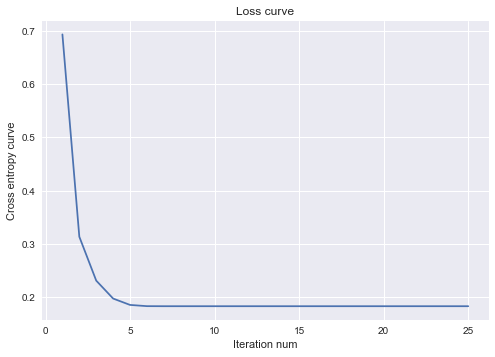

In [332]:
# Plot the loss curve
import matplotlib.pyplot as plt
plt.plot([i+1 for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Cross entropy curve")
plt.show()

In [333]:
our_model_test_acuracy = accuracy_score(y_test, predict(X_test, weights).round())
print(f"\nAccuracy in testing set by our model: {our_model_test_acuracy}")


Accuracy in testing set by our model: 0.9358974358974359


#### Compare with the scikit learn implementation

In [334]:
# Initialize the model
model = LogisticRegression(solver='newton-cg', verbose=1)

In [335]:
# Fit the model. Wait! We will complete this step for you ;)
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=1, warm_start=False)

In [336]:
# Predict on testing set X_test
y_pred = model.predict(X_test)

In [337]:
# Print Accuracy on testing set
sklearn_test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy in testing set by sklearn model: {sklearn_test_accuracy}")


Accuracy in testing set by sklearn model: 0.9423076923076923


In [338]:
#MSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions)
print(f"MSE: {mse}")
#R2 Score
from sklearn.metrics import r2_score
r2=r2_score(y_test,predictions)
print(f"R2: {r2}")

MSE: 0.4807692307692308
R2: -1.0584095707248418


In [339]:
from sklearn.model_selection import learning_curve
train_sizes=[5,10,25,50,100,150,200,250,300,350,400]
train_sizes,train_scores,validation_scores=learning_curve(
estimator=LogisticRegression(),
X=data.drop('class',axis=1).values,
y=data['class'].values,train_sizes=train_sizes,cv=5,
scoring='neg_mean_squared_error')


In [340]:
print('Training scores:\n\n',train_scores)
print('\n','-'*70) #separator
print('\nValidation scores:\n\n',validation_scores)

Training scores:

 [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.         -0.         -0.        ]
 [-0.02       -0.         -0.         -0.         -0.        ]
 [-0.05       -0.06       -0.06       -0.06       -0.06      ]
 [-0.06666667 -0.06666667 -0.04666667 -0.04666667 -0.04666667]
 [-0.07       -0.065      -0.055      -0.055      -0.055     ]
 [-0.056      -0.052      -0.052      -0.072      -0.072     ]
 [-0.06       -0.06       -0.05       -0.06333333 -0.06333333]
 [-0.07714286 -0.06857143 -0.06857143 -0.06571429 -0.06571429]
 [-0.08       -0.0625     -0.055      -0.065      -0.0625    ]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.18269231 -0.24038462 -0.27884615 -0.20192308 -0.19230769]
 [-0.17307692 -0.16346154 -0.14423077 -0.125      -0.125     ]
 [-0.09615385 -0.17307692 -0.18269231 -0.125      -0.125     ]
 [-

In [341]:
train_scores_mean=-train_scores.mean(axis=1)
validation_scores_mean=-validation_scores.mean(axis=1)
print('Mean training scores\n\n',pd.Series(train_scores_mean,index=train_sizes))
print('\n','-'*20) #separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean,index=train_sizes))

Mean training scores

 5     -0.000000
10    -0.000000
25    -0.000000
50     0.004000
100    0.058000
150    0.054667
200    0.060000
250    0.060800
300    0.059333
350    0.069143
400    0.065000
dtype: float64

 --------------------

Mean validation scores

 5      0.219231
10     0.146154
25     0.140385
50     0.126923
100    0.098077
150    0.090385
200    0.075000
250    0.069231
300    0.071154
350    0.071154
400    0.076923
dtype: float64


(0, 0.15)

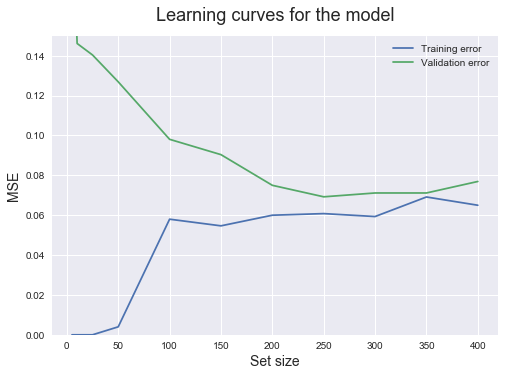

In [342]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(train_sizes,train_scores_mean,label='Training error')
plt.plot(train_sizes,validation_scores_mean,label='Validation error')
plt.ylabel('MSE',fontsize=14)
plt.xlabel('Set size',fontsize=14)
plt.title('Learning curves for the model',fontsize=18,y=1.03)
plt.legend()
plt.ylim(0,0.15)